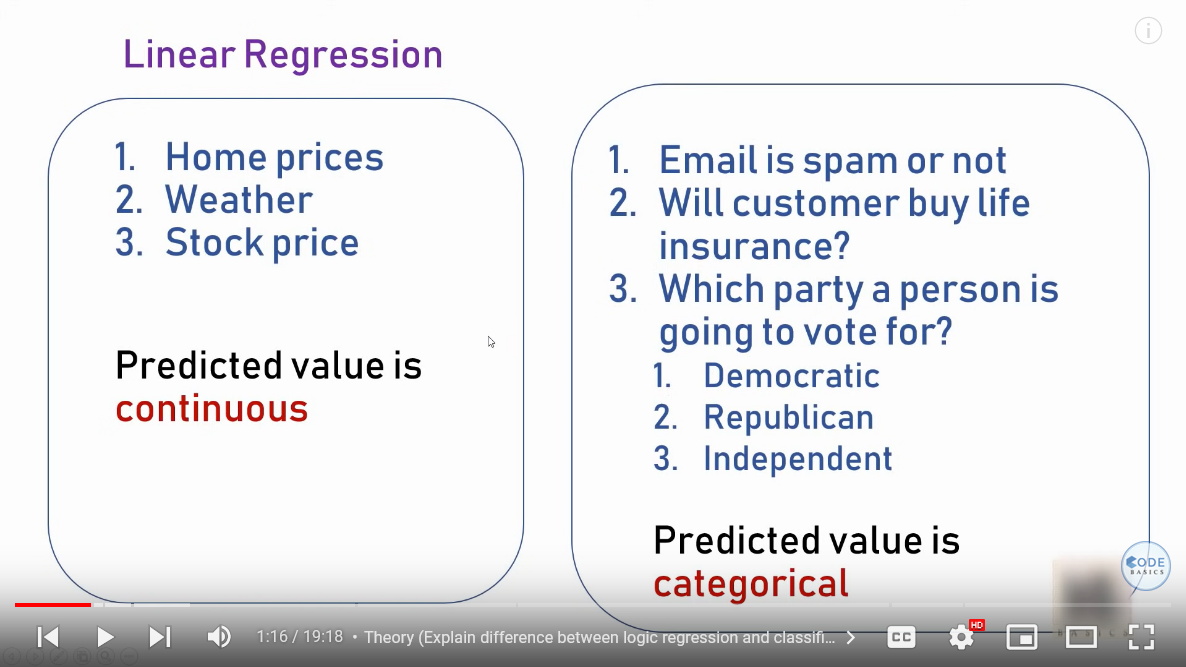
Logistic Regression is used to solve classsification problems

Predicting if a person would buy life insurnace based on his age using logistic regression
Above is a *binary logistic regression* problem as there are only two possible outcomes (i.e. if person buys insurance or he/she doesn't).


In [1]:
import pandas as pd
from matplotlib import pyplot as plt

In [2]:
df = pd.read_csv(r"F:\important\Data Scientist\ML\3_logistic regression\Dataset\insurance_data.csv")
df.head()

,age,bought_insurance
0,22,0
1,25,0
2,47,1
3,52,0
4,46,1


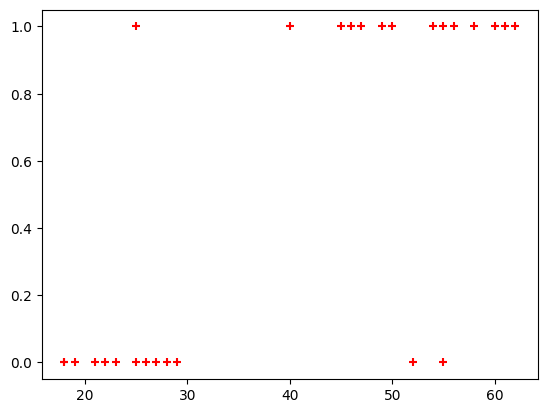

In [3]:
plt.scatter(df['age'],df['bought_insurance'],marker='+',color='red')

In [4]:
from  sklearn.model_selection import train_test_split

In [5]:
x=df[['age']]
x
# x should be multi dimensional

,age
0,22
1,25
2,47
3,52
4,46
5,56
6,55
7,60
8,62
9,61


In [6]:
y=df['bought_insurance']
y

0     0
1     0
2     1
3     0
4     1
5     1
6     0
7     1
8     1
9     1
10    0
11    0
12    0
13    0
14    1
15    1
16    1
17    1
18    0
19    0
20    0
21    0
22    1
23    1
24    1
25    1
26    0
Name: bought_insurance, dtype: int64

In [7]:
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.8)

In [8]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()

In [9]:
model.fit(x_train,y_train)

LogisticRegression()

In [10]:
x_test

,age
17,58
13,29
16,25
26,23
1,25
0,22


In [11]:
predicted=model.predict(x_test)
predicted

array([1, 0, 0, 0, 0, 0], dtype=int64)

In [12]:
model.predict_proba(x_test)

array([[0.06500392, 0.93499608],
       [0.8504595 , 0.1495405 ],
       [0.91259181, 0.08740819],
       [0.93397677, 0.06602323],
       [0.91259181, 0.08740819],
       [0.94274698, 0.05725302]])

In [13]:
model.score(x_test,y_test)

0.8333333333333334

sample problem
Download employee retention dataset from here: https://www.kaggle.com/giripujar/hr-analytics.

    Now do some exploratory data analysis to figure out which variables have direct and clear impact on employee retention (i.e. whether they leave the company or continue to work)
    Plot bar charts showing impact of employee salaries on retention
    Plot bar charts showing corelation between department and employee retention
    Now build logistic regression model using variables that were narrowed down in step 1
    Measure the accuracy of the model



In [14]:
import pandas as pd
from matplotlib import pyplot as plt

In [18]:
df = pd.read_csv(r"F:\important\Data Scientist\ML\3_logistic regression\Dataset\HR_comma_sep.csv")
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low



Data exploration and visualization


In [19]:
left=df[df['left']==1]
left.shape

(3571, 10)

In [20]:
retained=df[df['left']==0]
retained.shape

(11428, 10)

In [21]:
df.groupby('left').mean()

C:\Users\Arunprasath Manickam\AppData\Local\Temp\ipykernel_20064\588011459.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby('left').mean()


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years
left,,,,,,,
0,0.666810,0.715473,3.786664,199.060203,3.380032,0.175009,0.026251
1,0.440098,0.718113,3.855503,207.419210,3.876505,0.047326,0.005321




From above table we can draw following conclusions,

    **Satisfaction Level**: Satisfaction level seems to be relatively low (0.44) in employees leaving the firm vs the retained ones (0.66)
    **Average Monthly Hours**: Average monthly hours are higher in employees leaving the firm (199 vs 207)
    **Promotion Last 5 Years**: Employees who are given promotion are likely to be retained at firm

Impact of salary on employee retention


<Axes: xlabel='salary'>

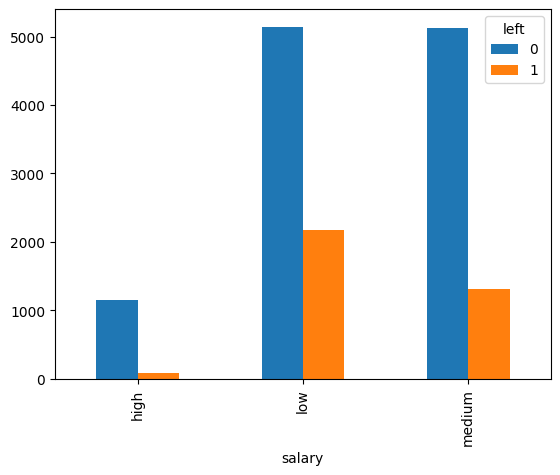

In [22]:
pd.crosstab(df.salary,df.left).plot(kind='bar')



Above bar chart shows employees with high salaries are likely to not leave the company

Department wise employee retention rate


<Axes: xlabel='Department'>

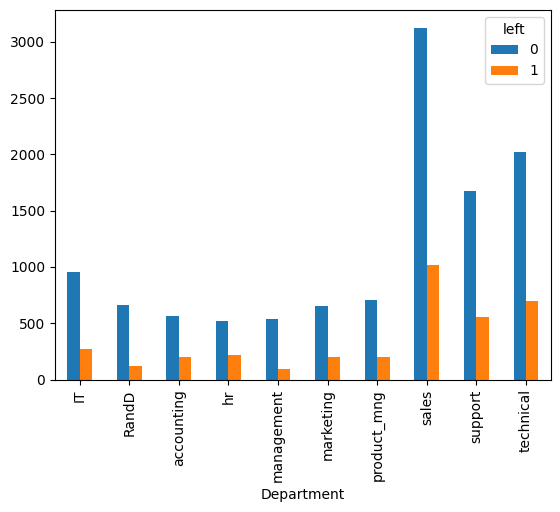

In [23]:
pd.crosstab(df.Department,df.left).plot(kind='bar')



From above chart there seem to be some impact of department on employee retention but it is not major hence we will ignore department in our analysis
From the data analysis so far we can conclude that we will use following variables as independant variables in our model

    **Satisfaction Level**
    **Average Monthly Hours**
    **Promotion Last 5 Years**
    **Salary**



In [24]:
subdf = df[['satisfaction_level','average_montly_hours','promotion_last_5years','salary']]
subdf.head()

,satisfaction_level,average_montly_hours,promotion_last_5years,salary
0,0.38,157,0,low
1,0.80,262,0,medium
2,0.11,272,0,medium
3,0.72,223,0,low
4,0.37,159,0,low




Tackle salary dummy variable

Salary has all text data. It needs to be converted to numbers and we will use dummy variable for that. Check my one hot encoding tutorial to understand purpose behind dummy variables.


In [25]:
salary_dummies = pd.get_dummies(subdf.salary, prefix="salary")

In [26]:
df_with_dummies = pd.concat([subdf,salary_dummies],axis='columns')

In [27]:
df_with_dummies.head()

,satisfaction_level,average_montly_hours,promotion_last_5years,salary,salary_high,salary_low,salary_medium
0,0.38,157,0,low,0,1,0
1,0.80,262,0,medium,0,0,1
2,0.11,272,0,medium,0,0,1
3,0.72,223,0,low,0,1,0
4,0.37,159,0,low,0,1,0




Now we need to remove salary column which is text data. It is already replaced by dummy variables so we can safely remove it


In [28]:
df_with_dummies.drop('salary',axis='columns',inplace=True)
df_with_dummies.head()

,satisfaction_level,average_montly_hours,promotion_last_5years,salary_high,salary_low,salary_medium
0,0.38,157,0,0,1,0
1,0.80,262,0,0,0,1
2,0.11,272,0,0,0,1
3,0.72,223,0,0,1,0
4,0.37,159,0,0,1,0


In [29]:
X = df_with_dummies
X.head()

,satisfaction_level,average_montly_hours,promotion_last_5years,salary_high,salary_low,salary_medium
0,0.38,157,0,0,1,0
1,0.80,262,0,0,0,1
2,0.11,272,0,0,0,1
3,0.72,223,0,0,1,0
4,0.37,159,0,0,1,0


In [30]:
y = df.left

In [31]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.3)


In [32]:


from sklearn.linear_model import LogisticRegression
model = LogisticRegression()



In [33]:
model.fit(X_train, y_train)

LogisticRegression()

In [34]:
model.predict(X_test)

array([0, 0, 1, ..., 0, 0, 0], dtype=int64)

In [35]:
model.score(X_test,y_test)

0.7751428571428571